# CLEANING AND PREPARING DATA WITH PYTHON

In [1]:
'''
python haas a built in function that handle the work of loading the csv module.

for the 
1. first step we will import the reader function from the csv module

'''

'\npython haas a built in function that handle the work of loading the csv module.\n\nfor the \n1. first step we will import the reader function from the csv module\n\n'

In [2]:
from csv import reader

In [3]:
opened_file=open('C:/dataset/artworks.csv',encoding="utf-8") #use the python open function to open the csv
read_file=reader(opened_file)                                #use the read function to read the files
moma=list(read_file)                                         #Genebrating a list of list
moma=moma[1:]                                                #removing the header content


In [4]:
print(moma[300][2])
print(moma[300][5])
print(moma[500][2])
print(moma[500][5])

(American)
(Male)
(Swiss)
(Male)


In [5]:



# we want to remove the opening and the closing braces using the str.replace() method

In [6]:
#removing the braces in index 2
for row in moma:
    nationality=row[2]
    nationality=nationality.replace("(","")
    nationality=nationality.replace(")","")
    row[2]=nationality

In [7]:
row[2]

'American'

In [8]:


#removing the braces in index 5
for row in moma:
    gender=row[5]
    gender=gender.replace("(","")
    gender=gender.replace(")","")
    row[5]=gender
    
    

In [9]:
row[5]

'Male'

In [10]:
# Ensuring each string in gender and nationality are consistent. that is all are
# in title case, I will use the str.title()

In [11]:
# ensuring the nationality are in consistent state
for row in moma:
    nationality=row[2]
    nationality=nationality.title()
    if not nationality:
        nationality="nationality unknown"
    row[2]=nationality
    

In [12]:
row[2]

'American'

In [13]:
# ensuring the gender are in consistent state
for row in moma:
    gender=row[5]
    gender=gender.title()
    if not gender:
        gender="gender unknown"
    row[5]=gender

In [14]:
row[5]

'Male'

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.DataFrame(moma)

In [17]:
df

,0,1,2,3,4,5,6,7
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,(1947),(2013),Female,1986,Prints & Illustrated Books
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,(1916),(2007),Male,1978,Prints & Illustrated Books
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,(1870),(1943),Male,1889-1911,Prints & Illustrated Books
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,(1861),(1944),Male,1927-1940,Prints & Illustrated Books
4,97 rue du Bac,Eugène Atget,French,(1857),(1927),Male,1903,Photography
...,...,...,...,...,...,...,...,...
16720,Oval with Points,Henry Moore,British,(1898),(1986),Male,1968-1969,Painting & Sculpture
16721,"Cementerio de la Ciudad Abierta, Ritoque, Chile",Juan Baixas,Chilean,(1942),,Male,1975,Architecture & Design
16722,The Catboat,Edward Hopper,American,(1882),(1967),Male,1922,Prints & Illustrated Books
16723,Dognat' i peregnat' v tekhniko-ekonomicheskom ...,Unknown,nationality unknown,,,gender unknown,1931,Prints & Illustrated Books


In [18]:
df.head()

,0,1,2,3,4,5,6,7
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,(1947),(2013),Female,1986,Prints & Illustrated Books
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,(1916),(2007),Male,1978,Prints & Illustrated Books
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,(1870),(1943),Male,1889-1911,Prints & Illustrated Books
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,(1861),(1944),Male,1927-1940,Prints & Illustrated Books
4,97 rue du Bac,Eugène Atget,French,(1857),(1927),Male,1903,Photography


In [19]:
df.describe()

,0,1,2,3,4,5,6,7
count,16725,16725,16725,16725,16725,16725,16725,16725
unique,13684,3957,83,190,145,3,1152,8
top,Untitled,Eugène Atget,American,,,Male,1967,Prints & Illustrated Books
freq,1000,705,7444,939,6251,13491,281,7624


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16725 entries, 0 to 16724
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16725 non-null  object
 1   1       16725 non-null  object
 2   2       16725 non-null  object
 3   3       16725 non-null  object
 4   4       16725 non-null  object
 5   5       16725 non-null  object
 6   6       16725 non-null  object
 7   7       16725 non-null  object
dtypes: object(8)
memory usage: 1.0+ MB


In [21]:
df.duplicated().any()

True

In [22]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [23]:
# cleaning the column 3 and 4 which is the birth_date and death_death

def clean_and_convert(date):
    if date !="":
        date=date.replace("(","")
        date=date.replace(")","")
        date=int(date)
    return date

#Calling the the column 3 and 4
for row in moma:
    birth_rate=row[3]
    death_rate=row[4]
    
    birth_rate=clean_and_convert(birth_rate)
    death_rate=clean_and_convert(death_rate)
    
    row[3]=birth_rate
    row[4]=death_rate

In [24]:
df1=pd.DataFrame(moma)
df1

,0,1,2,3,4,5,6,7
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947,2013,Female,1986,Prints & Illustrated Books
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916,2007,Male,1978,Prints & Illustrated Books
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870,1943,Male,1889-1911,Prints & Illustrated Books
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861,1944,Male,1927-1940,Prints & Illustrated Books
4,97 rue du Bac,Eugène Atget,French,1857,1927,Male,1903,Photography
...,...,...,...,...,...,...,...,...
16720,Oval with Points,Henry Moore,British,1898,1986,Male,1968-1969,Painting & Sculpture
16721,"Cementerio de la Ciudad Abierta, Ritoque, Chile",Juan Baixas,Chilean,1942,,Male,1975,Architecture & Design
16722,The Catboat,Edward Hopper,American,1882,1967,Male,1922,Prints & Illustrated Books
16723,Dognat' i peregnat' v tekhniko-ekonomicheskom ...,Unknown,nationality unknown,,,gender unknown,1931,Prints & Illustrated Books


In [25]:
#Learning how to clean unwanted date
test_data = ["1912", "1929", "1913-1923",
             "(1951)", "1994", "1934",
             "c. 1915", "1995", "c. 1912",
             "(1988)", "2002", "1957-1959",
             "c. 1955.", "c. 1970's", 
             "C. 1990-1999"]

bad_chars = ["(",")","c","C",".","s","'", " ","-"]


def strip_characters(string):
    for char in bad_chars:
        string = string.replace(char,"")
    return string

stripped_test_data = []
for d in test_data:
    date = strip_characters(d)
    stripped_test_data.append(date)
print(stripped_test_data)

['1912', '1929', '19131923', '1951', '1994', '1934', '1915', '1995', '1912', '1988', '2002', '19571959', '1955', '1970', '19901999']


In [26]:
test_data = ["1912", "1929", "1913-1923",
             "(1951)", "1994", "1934",
             "c. 1915", "1995", "c. 1912",
             "(1988)", "2002", "1957-1959",
             "c. 1955.", "c. 1970's", 
             "C. 1990-1999"]

bad_chars = ["(",")","c","C",".","s","'", " "]

def strip_characters(string):
    for char in bad_chars:
        string = string.replace(char,"")
    return string

stripped_test_data = ['1912', '1929', '1913-1923',
                      '1951', '1994', '1934',
                      '1915', '1995', '1912',
                      '1988', '2002', '1957-1959',
                      '1955', '1970', '1990-1999']


def process_date(date):
    if "-" in date:
        split_date = date.split("-")
        date_one = split_date[0]
        date_two = split_date[1]       
        date = (int(date_one) + int(date_two)) / 2
        date = round(date)
    else:
        date = int(date)
    return date

processed_test_data = []

for d in stripped_test_data:
    date = process_date(d)
    processed_test_data.append(date)

for row in moma:
    date = row[6]
    date = strip_characters(date)
    date = process_date(date)
    row[6] = date

In [27]:
df2=pd.DataFrame(moma)

In [28]:
df2

,0,1,2,3,4,5,6,7
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947,2013,Female,1986,Prints & Illustrated Books
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916,2007,Male,1978,Prints & Illustrated Books
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870,1943,Male,1900,Prints & Illustrated Books
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861,1944,Male,1934,Prints & Illustrated Books
4,97 rue du Bac,Eugène Atget,French,1857,1927,Male,1903,Photography
...,...,...,...,...,...,...,...,...
16720,Oval with Points,Henry Moore,British,1898,1986,Male,1968,Painting & Sculpture
16721,"Cementerio de la Ciudad Abierta, Ritoque, Chile",Juan Baixas,Chilean,1942,,Male,1975,Architecture & Design
16722,The Catboat,Edward Hopper,American,1882,1967,Male,1922,Prints & Illustrated Books
16723,Dognat' i peregnat' v tekhniko-ekonomicheskom ...,Unknown,nationality unknown,,,gender unknown,1931,Prints & Illustrated Books


In [29]:
df2.head()

,0,1,2,3,4,5,6,7
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947,2013,Female,1986,Prints & Illustrated Books
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916,2007,Male,1978,Prints & Illustrated Books
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870,1943,Male,1900,Prints & Illustrated Books
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861,1944,Male,1934,Prints & Illustrated Books
4,97 rue du Bac,Eugène Atget,French,1857,1927,Male,1903,Photography


In [30]:
# converting the date column to integer
for row in moma:
    date=row[6]
    if date !="":
        date=int(date)
    row[6]=date

In [31]:
#Calulating the artist age as at when the artist started the artwork
ages = []
for row in moma:
    birth = row[3]
    date = row[6]
    if type(birth) == int:
        age = date - birth
    else:
        age = 0
    ages.append(age)

final_ages = []
for age in ages:
    if age > 20:
        final_age = age
    else:
        final_age = "Unknown"
    final_ages.append(final_age)

In [32]:
df3=pd.DataFrame(moma)
df3.head()

,0,1,2,3,4,5,6,7
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947,2013,Female,1986,Prints & Illustrated Books
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916,2007,Male,1978,Prints & Illustrated Books
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870,1943,Male,1900,Prints & Illustrated Books
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861,1944,Male,1934,Prints & Illustrated Books
4,97 rue du Bac,Eugène Atget,French,1857,1927,Male,1903,Photography


In [33]:
# CONVERTING AGE TO DECADES
# The final_ages variable is available
# from the previous screen

decades = []

for age in final_ages:
    if age == "Unknown":
        decade = age
    else:
        decade = str(age)
        decade = decade[:-1]
        decade = decade + "0s"
    decades.append(decade)

In [34]:
#print(decades)

In [35]:
#Converting the decade age into a frequency table

decade_freq={}
for item in decades:
    if item not in decade_freq:
        decade_freq[item]=1
    else:
        decade_freq[item]+=1
    #print(decade_freq)

In [36]:
# Checking through the dataset to find the artist to be displayed in a frequency table

artist_freq={}

for row in moma:
    artist=row[1]
    if artist not in artist_freq:
        artist_freq[artist]=1
    else:
        artist_freq[artist] +=1
    #print(artist_freq)

In [37]:
#USING FUNCTIONS TO CALCULATE THE ARTIST WORK

def artist_summary(artist):
    artist_work=artist_freq[artist]
    template= "There are {num} artworks by {name} in the dataset"
    template_result=template.format(name=artist,num=artist_work)
    print(template_result)
    
artist_summary("Henri Matisse")

There are 129 artworks by Henri Matisse in the dataset


In [38]:
gender_freq = {}

for row in moma:
    gender = row[5]
    if gender not in gender_freq:
        gender_freq[gender] = 1
    else:
        gender_freq[gender] += 1

for gender, num in gender_freq.items():
    template = "There are {n:,} artworks by {g} artists"
    print(template.format(g=gender, n=num))

There are 2,443 artworks by Female artists
There are 13,491 artworks by Male artists
There are 791 artworks by gender unknown artists


In [ ]:
#Plotting the Chart

In [39]:
df4=pd.DataFrame(moma)
df4.head()

,0,1,2,3,4,5,6,7
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947,2013,Female,1986,Prints & Illustrated Books
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916,2007,Male,1978,Prints & Illustrated Books
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870,1943,Male,1900,Prints & Illustrated Books
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861,1944,Male,1934,Prints & Illustrated Books
4,97 rue du Bac,Eugène Atget,French,1857,1927,Male,1903,Photography


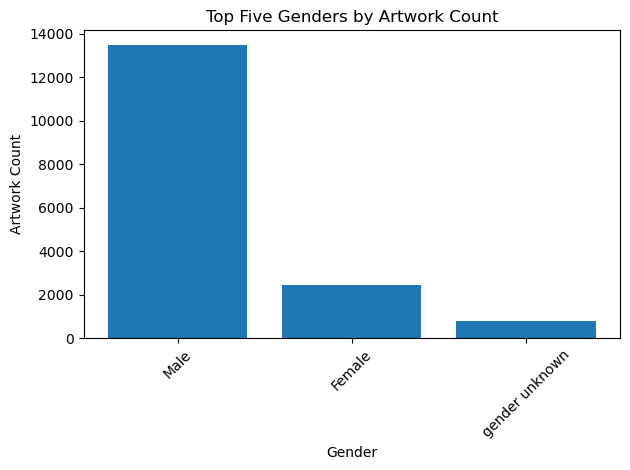

In [49]:



# Calculate artwork count by gender
gender_counts = df4[5].value_counts()

# Select the top five genders
top_five_genders = gender_counts.head(5)

# Create a bar chart of the top five genders
plt.bar(top_five_genders.index, top_five_genders.values)
plt.xlabel('Gender')
plt.ylabel('Artwork Count')
plt.title('Top Five Genders by Artwork Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()



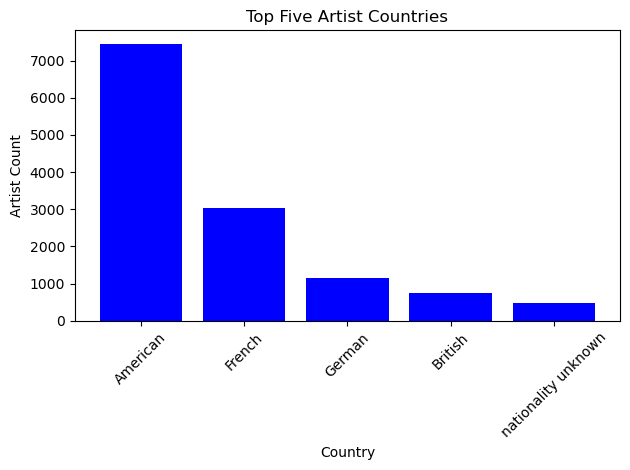

In [48]:



# Calculate the top five artist countries
top_countries = df4[2].value_counts().head(5)

# Create a bar plot for the top five artist countries
plt.bar(top_countries.index, top_countries.values, color='b')
plt.xlabel('Country')
plt.ylabel('Artist Count')
plt.title('Top Five Artist Countries')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar plot
plt.show()


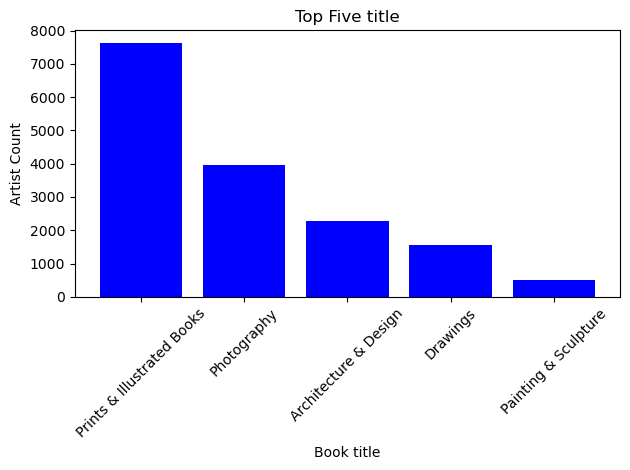

In [50]:
# Calculate the top five artist countries
top_countries = df4[7].value_counts().head(5)

# Create a bar plot for the top five artist countries
plt.bar(top_countries.index, top_countries.values, color='b')
plt.xlabel('Book title')
plt.ylabel('Artist Count')
plt.title('Top Five title')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar plot
plt.show()